# Heart Disease Classification using Machine Learning model

## Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import RocCurveDisplay

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Importing dataset

In [3]:
df= pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### About dataset

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **age** | Age in years | 29, 45, 60 |
| **sex** | 1 = male; 0 = female | 0, 1  |
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital)  | 120, 140, 150 |
| **chol** | Serum cholesterol in mg/dl | 180, 220, 250 |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) | 0, 1 |
| **restecg** | Resting electrocardiographic results | 0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy  |
| **thalach** | Maximum heart rate achieved | 160, 180, 190 |
| **exang**  | Exercise induced angina (1 = yes; 0 = no) | 0, 1 |
| **oldpeak**  | ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest | 0.5, 1.0, 2.0  |
| **slope** | The slope of the peak exercise ST segment | 0: Upsloping, 1: Flatsloping, 2: Downsloping |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy | 0, 1, 2, 3 |
| **thal** | Thalium stress result  | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect |
| **target** | Have disease or not (1 = yes; 0 = no) | 0, 1 |


In [4]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

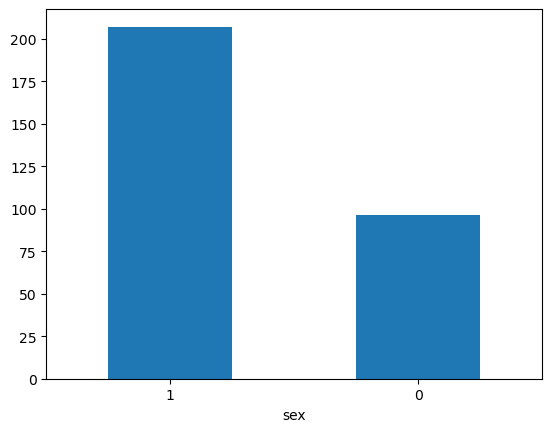

In [5]:
df.sex.value_counts().plot.bar()
plt.xticks(rotation=0)

In [6]:
df.sex

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

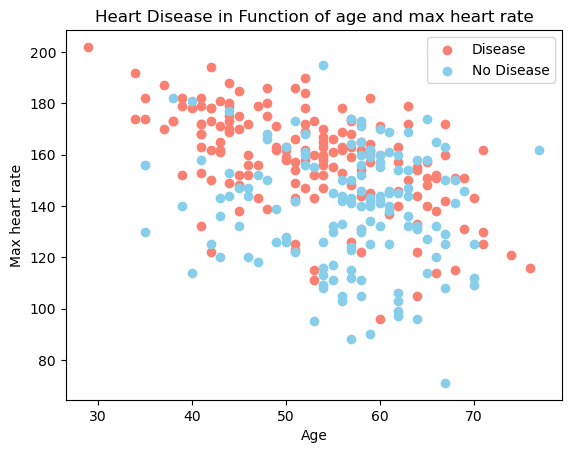

In [7]:
# thalach	Maximum heart rate achieved
plt.scatter(df.age[df.target==1], df.thalach[df.target==1],c='salmon')
plt.scatter(df.age[df.target==0], df.thalach[df.target==0],c='skyblue')
plt.ylabel('Max heart rate')
plt.xlabel('Age')
plt.title('Heart Disease in Function of age and max heart rate')
plt.legend(['Disease','No Disease'])

### Heart Disease Frequency per chest pain type
cp - Chest pain type 
- 0: Typical angina (chest pain),
- 1: Atypical angina (chest pain not related to heart),
- 2: Non-anginal pain (typically esophageal spasms (non heart related),
- 3: Asymptomatic (chest pain not showing signs of disease) 

In [8]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

<Axes: xlabel='cp'>

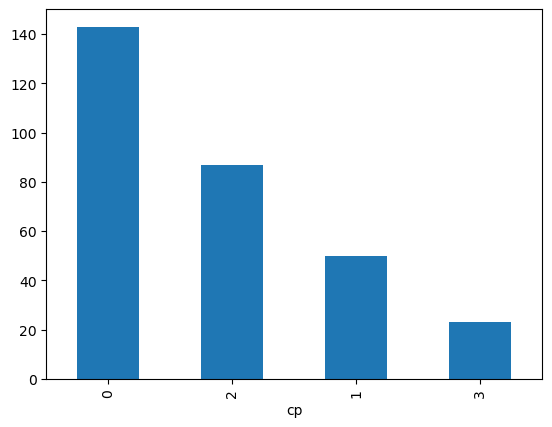

In [9]:
df.cp.value_counts().plot.bar()

Text(0.5, 0, '0= female 1=male')

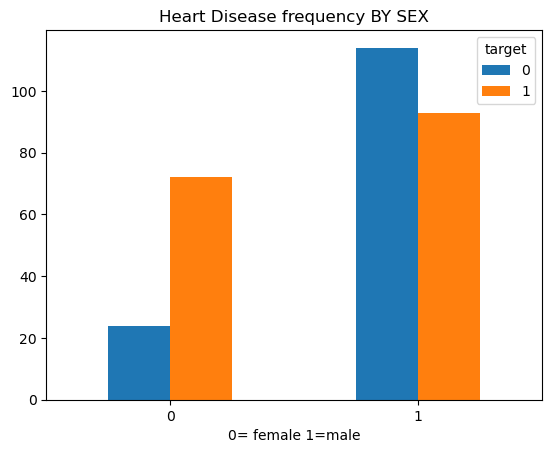

In [10]:
pd.crosstab(df.sex,df.target).plot(kind='bar')
plt.title('Heart Disease frequency BY SEX')
plt.xticks(rotation=0)
plt.xlabel('0= female 1=male')

Text(0.5, 1.0, 'heart disease frequency per chest pain type')

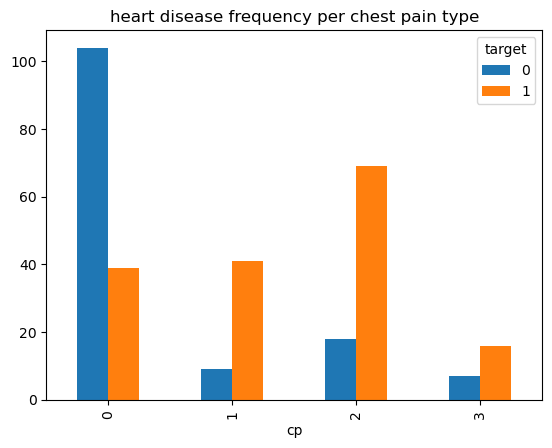

In [11]:
pd.crosstab(df.cp,df.target).plot.bar()
plt.title('heart disease frequency per chest pain type')

### how much data are related ?

<Axes: >

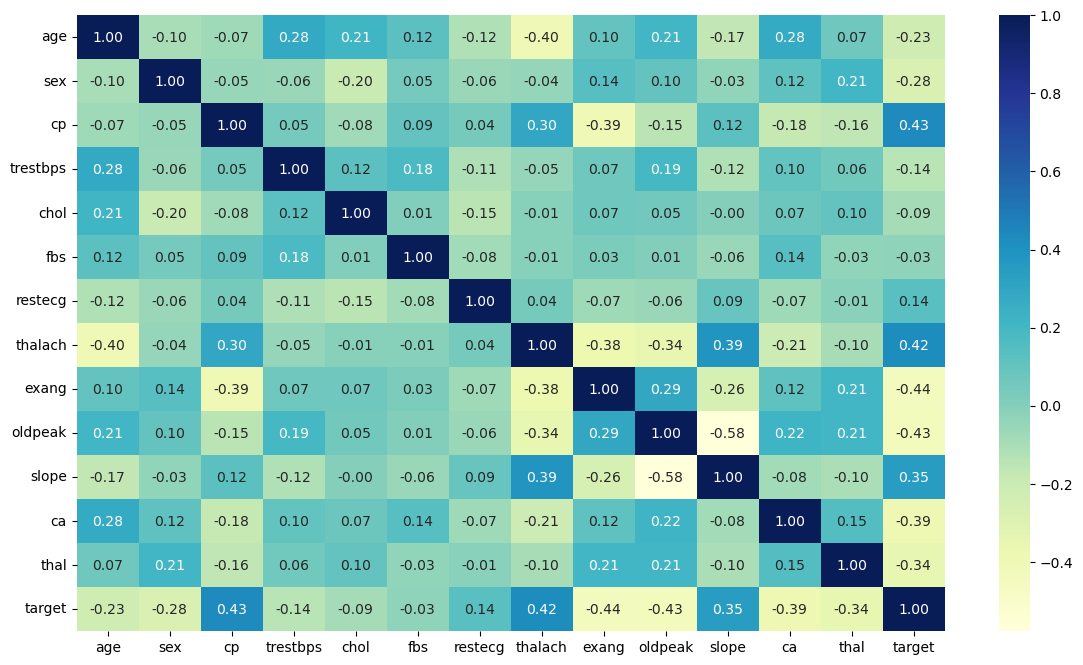

In [12]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True, fmt='.2f', cmap='YlGnBu')

### Data Modelling

### splitting features and targets

In [13]:
X= df.drop('target',axis=1)
y= df.target

### splitting training and test set

In [14]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [15]:
models= {'Logistic Regression':LogisticRegression(),
        'KNN':KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier()}

In [16]:
def train_and_test(models,X_train,X_test,y_train,y_test):
    model_scores= {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        score= model.score(X_test,y_test)
        model_scores[name]= score
    return model_scores

In [17]:
model_scores= train_and_test(models,X_train,X_test,y_train,y_test)
model_scores

C:\Users\me\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.7868852459016393}

### Model Comparision

In [18]:
pd.DataFrame(model_scores,index=['accuracy']).T

,accuracy
Logistic Regression,0.770492
KNN,0.590164
Random Forest,0.786885


(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

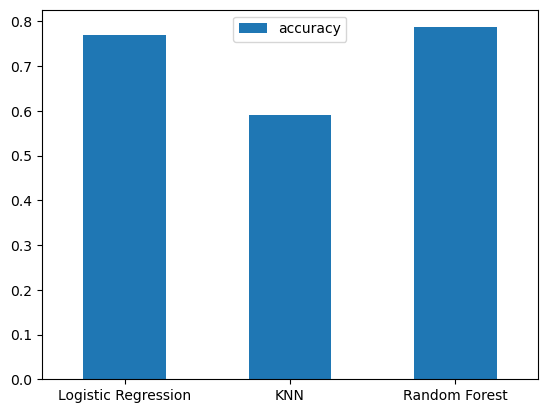

In [19]:
pd.DataFrame(model_scores,index=['accuracy']).T.plot(kind='bar')
plt.xticks(rotation=0)

## Hyperparameter tuning on KNN

In [20]:
train_scores= []
test_scores= []

knn= KNeighborsClassifier()
neighbors= np.arange(1,20)

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    # append train and test scores
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

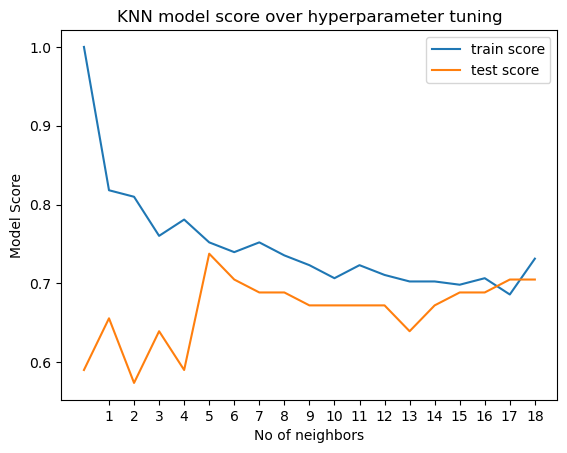

Max model score on test data: 0.74


In [21]:
plt.xticks(np.arange(1,21))
plt.plot(train_scores)
plt.plot(test_scores)

plt.legend(['train score','test score'])
plt.title('KNN model score over hyperparameter tuning')
plt.xlabel('No of neighbors')
plt.ylabel('Model Score')
plt.show()
print(f'Max model score on test data: {max(test_scores):.2f}')

## Hyperparameter tuning on LogisticRegresson and Random Forest
1. RandomizedSearchCV
2. GridSearchCV

### Randomized Search Cross Validation

In [22]:
# hyper-parameters for logistic regresson
log_params= {'C':np.logspace(-2,2,20),'solver':['liblinear']}

# hyper-parameters for Random Forest Classifier
rf_params= {'C':np.arange(1,100,5), 'min_samples_split':4,'min_samples_leaf':2}

In [23]:
rn_log_clf= RandomizedSearchCV(estimator= LogisticRegression(), param_distributions=log_params,
                      cv=5, # corss validation sample =5
                      n_iter=10,
                      verbose=3)
rn_log_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .........C=100.0, solver=liblinear;, score=0.796 total time=   0.0s
[CV 2/5] END .........C=100.0, solver=liblinear;, score=0.816 total time=   0.0s
[CV 3/5] END .........C=100.0, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END .........C=100.0, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END .........C=100.0, solver=liblinear;, score=0.833 total time=   0.0s
[CV 1/5] END ..........C=0.01, solver=liblinear;, score=0.735 total time=   0.0s
[CV 2/5] END ..........C=0.01, solver=liblinear;, score=0.755 total time=   0.0s
[CV 3/5] END ..........C=0.01, solver=liblinear;, score=0.688 total time=   0.0s
[CV 4/5] END ..........C=0.01, solver=liblinear;, score=0.792 total time=   0.0s
[CV 5/5] END ..........C=0.01, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=61.584821106602604, solver=liblinear;, score=0.796 total time=   0.0s
[CV 2/5] END C=61.584821106602604, solver=li

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02]),
                                        'solver': ['liblinear']},
                   verbose=3)

In [24]:
rn_log_clf.best_params_

{'solver': 'liblinear', 'C': 0.7847599703514611}

In [25]:
 rn_log_clf.best_score_

0.8390306122448979

In [26]:
rn_log_clf.score(X_test,y_test)

0.7704918032786885

In [27]:
model_scores

{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.7868852459016393}

In [28]:
rf_params= {'n_estimators':np.arange(1,100,5), 'min_samples_split':np.arange(2,20,1),'min_samples_leaf':np.arange(1,20,2)}
rn_rf_clf= RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=rf_params,
                          cv=5, n_iter=100,
                          verbose=3)
rn_rf_clf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END min_samples_leaf=17, min_samples_split=15, n_estimators=56;, score=0.796 total time=   0.0s
[CV 2/5] END min_samples_leaf=17, min_samples_split=15, n_estimators=56;, score=0.837 total time=   0.0s
[CV 3/5] END min_samples_leaf=17, min_samples_split=15, n_estimators=56;, score=0.854 total time=   0.0s
[CV 4/5] END min_samples_leaf=17, min_samples_split=15, n_estimators=56;, score=0.875 total time=   0.0s
[CV 5/5] END min_samples_leaf=17, min_samples_split=15, n_estimators=56;, score=0.833 total time=   0.0s
[CV 1/5] END min_samples_leaf=15, min_samples_split=13, n_estimators=36;, score=0.796 total time=   0.0s
[CV 2/5] END min_samples_leaf=15, min_samples_split=13, n_estimators=36;, score=0.837 total time=   0.0s
[CV 3/5] END min_samples_leaf=15, min_samples_split=13, n_estimators=36;, score=0.875 total time=   0.0s
[CV 4/5] END min_samples_leaf=15, min_samples_split=13, n_estimators=36;, score=0.917 total time=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
                   verbose=3)

In [29]:
rn_rf_clf.best_params_

{'n_estimators': 26, 'min_samples_split': 13, 'min_samples_leaf': 1}

In [30]:
rn_rf_clf.best_score_

0.8681972789115647

In [31]:
rn_rf_clf.score(X_test,y_test)

0.819672131147541

In [32]:
model_scores

{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.7868852459016393}

### Grid Search

In [33]:
gs_log_clf = GridSearchCV(estimator=LogisticRegression(), param_grid=log_params, cv=5,verbose=3 )
gs_log_clf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..........C=0.01, solver=liblinear;, score=0.735 total time=   0.0s
[CV 2/5] END ..........C=0.01, solver=liblinear;, score=0.755 total time=   0.0s
[CV 3/5] END ..........C=0.01, solver=liblinear;, score=0.688 total time=   0.0s
[CV 4/5] END ..........C=0.01, solver=liblinear;, score=0.792 total time=   0.0s
[CV 5/5] END ..........C=0.01, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.016237767391887217, solver=liblinear;, score=0.755 total time=   0.0s
[CV 2/5] END C=0.016237767391887217, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.016237767391887217, solver=liblinear;, score=0.708 total time=   0.0s
[CV 4/5] END C=0.016237767391887217, solver=liblinear;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.016237767391887217, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.026366508987303583, solver=liblinear;, score=0.755 total time=   0.0s
[CV 2/5] EN

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02]),
                         'solver': ['liblinear']},
             verbose=3)

In [34]:
gs_log_clf.best_score_

0.8390306122448979

In [35]:
gs_log_clf.score(X_train,y_train)

0.8636363636363636

In [36]:
model_scores

{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.7868852459016393}

## evalutating our tuned machine learning classifier, beyond accuracy
- ROC curve and AUC score
- confusion matrix
- classification report
- precision 
- recall
- f1 score


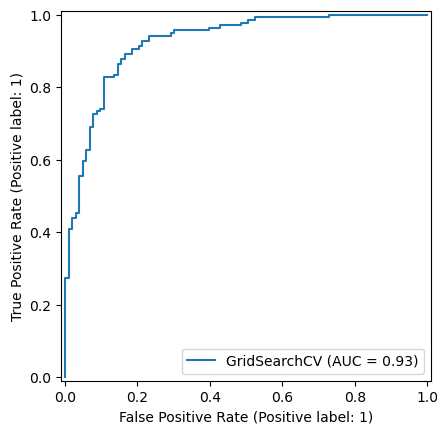

In [37]:
RocCurveDisplay.from_estimator(estimator=gs_log_clf,X=X_train,y= y_train)

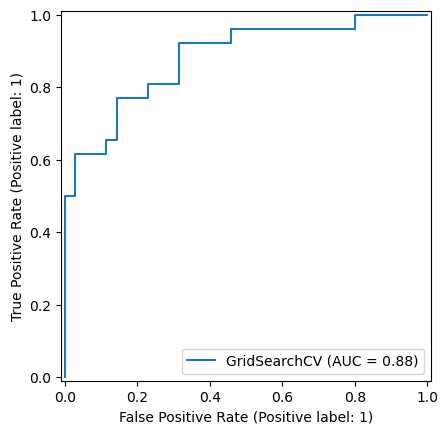

In [38]:
RocCurveDisplay.from_estimator(estimator=gs_log_clf,X=X_test,y= y_test)

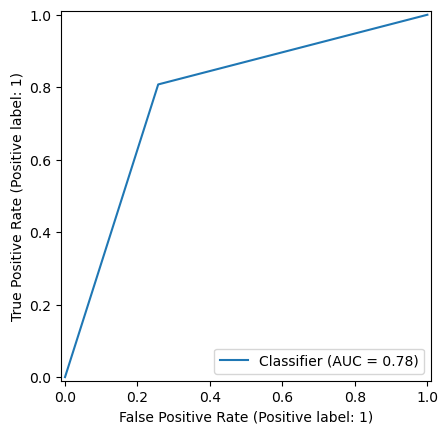

In [39]:
y_pred= gs_log_clf.predict(X_test)
RocCurveDisplay.from_predictions(y_test,y_pred)

### confustion matrix

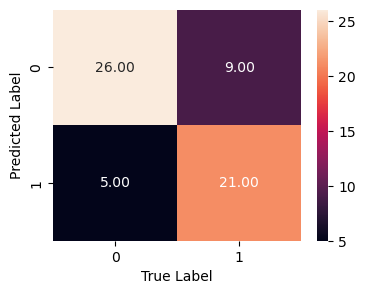

In [40]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In [41]:
accuracy_score(y_test,y_pred)

0.7704918032786885

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        35
           1       0.70      0.81      0.75        26

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



## calculate evaluation metrics using cross validataion

In [43]:
gs_log_clf.best_params_

{'C': 0.4832930238571752, 'solver': 'liblinear'}

In [44]:
clf= LogisticRegression(C=0.4832930238571752, solver='liblinear')

In [45]:
cross_val_score(estimator=clf, X=X_train,y=y_train)

array([0.79591837, 0.83673469, 0.85416667, 0.875     , 0.83333333])

In [46]:
cross_val_score(estimator=clf, X=X_test,y=y_test)

array([0.92307692, 0.66666667, 0.83333333, 0.58333333, 0.83333333])

In [47]:
np.mean(cross_val_score(estimator=clf, X=X_test,y=y_test))

0.7679487179487181

### cross validated accuracy, precision, recall, f1-score

In [48]:
cross_val_score(estimator=clf, X=X_test, y=y_test, scoring='accuracy')

array([0.92307692, 0.66666667, 0.83333333, 0.58333333, 0.83333333])

In [49]:
#accuracy
cv_accuracy= cross_val_score(estimator=clf, X=X_test, y=y_test, scoring='accuracy')
cv_accuracy= np.mean(cv_accuracy)

#precision 
cv_precision= cross_val_score(estimator=clf, X=X_test, y=y_test, scoring='precision')
cv_precision= np.mean(cv_precision)

# recall
cv_recall= cross_val_score(estimator=clf, X=X_test, y=y_test, scoring='recall')
cv_recall= np.mean(cv_recall)

# f1-score
cv_f1_score= cross_val_score(estimator=clf, X=X_test, y=y_test, scoring='f1')
cv_f1_score= np.mean(cv_f1_score)

In [50]:
cv_metrics= pd.DataFrame({'accuracy':cv_accuracy, 'precision':cv_precision, 'recall':cv_recall, 'f1_score':cv_f1_score}
                         ,index=[0])
cv_metrics

,accuracy,precision,recall,f1_score
0,0.767949,0.734286,0.76,0.730373


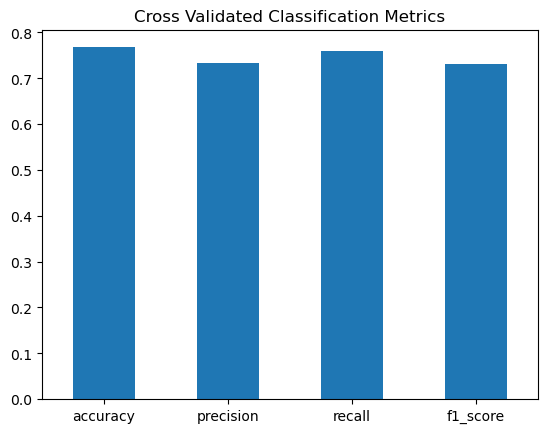

In [51]:
cv_metrics.T.plot.bar(title='Cross Validated Classification Metrics',legend=False)
plt.xticks(rotation=0)
plt.show()

## Feature Importance

In [52]:
gs_log_clf.best_params_

{'C': 0.4832930238571752, 'solver': 'liblinear'}

In [53]:
clf= LogisticRegression(C=0.4832930238571752, solver= 'liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.4832930238571752, solver='liblinear')

In [54]:
clf.coef_

array([[ 0.00927037, -1.33625605,  0.74287243, -0.01883883, -0.00552461,
        -0.0390041 ,  0.21063032,  0.03271524, -0.61517354, -0.30588974,
         0.57490797, -0.89080932, -0.46299993]])

In [55]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [56]:
feature_dict= dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.00927036723199339,
 'sex': -1.3362560498767677,
 'cp': 0.7428724301708103,
 'trestbps': -0.018838830811650418,
 'chol': -0.005524613416466734,
 'fbs': -0.0390040966632836,
 'restecg': 0.2106303231060693,
 'thalach': 0.032715235328666624,
 'exang': -0.6151735411802445,
 'oldpeak': -0.3058897382217496,
 'slope': 0.5749079675753747,
 'ca': -0.890809315246799,
 'thal': -0.46299993093427766}

In [57]:
feature_df= pd.DataFrame(feature_dict, index=['coef'])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
coef,0.00927,-1.336256,0.742872,-0.018839,-0.005525,-0.039004,0.21063,0.032715,-0.615174,-0.30589,0.574908,-0.890809,-0.463


<Axes: >

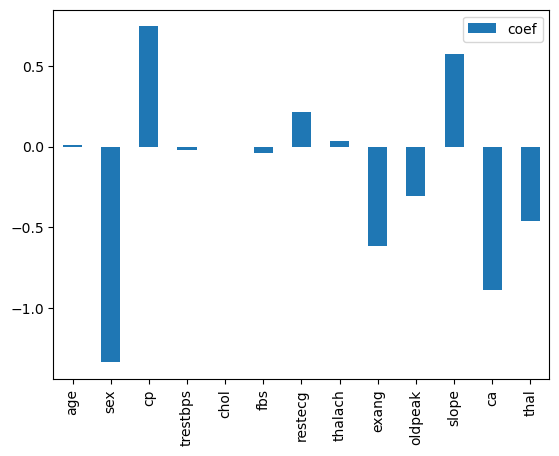

In [58]:
feature_df.T.plot.bar()

Here, Sex is a leading factor for Heart Disease.
- When sex is higher(1) i.e male, Heart Disease decreases(0) i.e No heart disease.
- This shows female has higher chance of having Heart Disease.

In [59]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [60]:
72/(24+72)

0.75

In [61]:
93/(93+114)

0.4492753623188406

Hence the Heart Disease proprotion on female is higher comparatively.